In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

In [44]:
df=pd.read_csv(r"D:\RESUME ML PROJECTS\student_performance\notebooks\cleanedddata.csv")
df.head()

,Unnamed: 0,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,0,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,2,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,3,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,4,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [45]:
df=df.drop(columns="Unnamed: 0")

In [46]:
df.head()

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [47]:
x=df.drop(columns="GPA")
y=df["GPA"]
print(x.head())

   Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  Absences  \
0   17       1          0                  2        19.833723         7   
1   18       0          0                  1        15.408756         0   
2   15       0          2                  3         4.210570        26   
3   17       1          0                  3        10.028829        14   
4   17       1          0                  2         4.672495        17   

   Tutoring  ParentalSupport  Extracurricular  Sports  Music  Volunteering  \
0         1                2                0       0      1             0   
1         0                1                0       0      0             0   
2         0                2                0       0      0             0   
3         0                3                1       0      0             0   
4         1                3                0       0      0             0   

   GradeClass  
0         2.0  
1         1.0  
2         4.0  
3         3.0  


In [48]:
from sklearn.compose import ColumnTransformer
num_features=x.select_dtypes(exclude="object").columns
num_features
cat_features=x.select_dtypes(include="object").columns


numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    transformers=[
      ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [49]:
X = preprocessor.fit_transform(x)

In [50]:
X.shape

(2392, 13)

In [51]:
X

array([[ 0.47291901,  0.97849211, -0.85339088, ...,  2.01954358,
        -0.43186565, -0.79738659],
       [ 1.36294441, -1.02198065, -0.85339088, ..., -0.49516139,
        -0.43186565, -1.60798953],
       [-1.30713178, -1.02198065,  1.09164102, ..., -0.49516139,
        -0.43186565,  0.82381929],
       ...,
       [-0.41710638,  0.97849211, -0.85339088, ..., -0.49516139,
         2.31553495, -0.79738659],
       [-0.41710638,  0.97849211,  0.11912507, ...,  2.01954358,
        -0.43186565, -1.60798953],
       [-0.41710638,  0.97849211, -0.85339088, ..., -0.49516139,
         2.31553495, -1.60798953]])

In [52]:
X=pd.DataFrame(X)

In [53]:
X

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.472919,0.978492,-0.853391,0.253711,1.780336,-0.890822,1.522371,-0.108744,-0.788476,-0.660132,2.019544,-0.431866,-0.797387
1,1.362944,-1.021981,-0.853391,-0.746087,0.997376,-1.717694,-0.656870,-0.999551,-0.788476,-0.660132,-0.495161,-0.431866,-1.607990
2,-1.307132,-1.021981,1.091641,1.253509,-0.984045,1.353542,-0.656870,-0.108744,-0.788476,-0.660132,-0.495161,-0.431866,0.823819
3,0.472919,0.978492,-0.853391,1.253509,0.045445,-0.063951,-0.656870,0.782063,1.268269,-0.660132,-0.495161,-0.431866,0.013216
4,0.472919,0.978492,-0.853391,0.253711,-0.902311,0.290422,1.522371,0.782063,-0.788476,-0.660132,-0.495161,-0.431866,0.823819
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,1.362944,0.978492,-0.853391,1.253509,0.160762,-1.481445,-0.656870,1.672869,1.268269,-0.660132,-0.495161,-0.431866,-2.418592
2388,0.472919,-1.021981,-0.853391,-0.746087,-0.387285,-1.245196,1.522371,1.672869,-0.788476,1.514848,-0.495161,-0.431866,0.823819
2389,-0.417106,0.978492,-0.853391,0.253711,-0.524895,0.644796,-0.656870,-0.108744,-0.788476,-0.660132,-0.495161,2.315535,-0.797387
2390,-0.417106,0.978492,0.119125,-1.745885,0.467950,0.290422,-0.656870,-0.108744,-0.788476,1.514848,2.019544,-0.431866,-1.607990


In [54]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [55]:
print(X.shape,x_train.shape,x_test.shape)

(2392, 13) (1913, 13) (479, 13)


In [56]:
models={
    "linear":LinearRegression(),
    "svm":SVR(),
    "decision tree":DecisionTreeRegressor(),
    "random":RandomForestRegressor(),
    "neoghbors":KNeighborsRegressor()
}

In [58]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Lists to store model names and r2 scores
model_list = []
r2_scores = []

# Iterate over models
for i in range(len(list(models))):
    model_name = list(models.keys())[i]
    model = list(models.values())[i]
    model.fit(x_train, y_train)
    
    # Predictions
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    # Evaluation function
    def evaluate_model(true, predicted):
        mse = mean_squared_error(true, predicted)
        mae = mean_absolute_error(true, predicted)
        r2 = r2_score(true, predicted)
        return mse, mae, r2
    
    # Evaluate model performance on training and test data
    model_train_mse, model_train_mae, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mse, model_test_mae, model_test_r2 = evaluate_model(y_test, y_test_pred)
    
    # Print the model name
    print(f"Model: {model_name}")
    model_list.append(model_name)
    
    # Print training performance
    print("Performance for Train Data")
    print(f"MSE: {model_train_mse:.4f}")
    print(f"MAE: {model_train_mae:.4f}")
    print(f"R2: {model_train_r2:.4f}")
    
    print("--------------------------------------------------")
    
    # Print test performance
    print("Performance for Test Data")
    print(f"MSE: {model_test_mse:.4f}")
    print(f"MAE: {model_test_mae:.4f}")
    print(f"R2: {model_test_r2:.4f}")
    r2_scores.append(model_test_r2)
    
    print("=" * 35)
    print('\n')




Model: linear
Performance for Train Data
MSE: 0.0368
MAE: 0.1549
R2: 0.9554
--------------------------------------------------
Performance for Test Data
MSE: 0.0328
MAE: 0.1505
R2: 0.9628


Model: svm
Performance for Train Data
MSE: 0.0221
MAE: 0.1155
R2: 0.9733
--------------------------------------------------
Performance for Test Data
MSE: 0.0403
MAE: 0.1604
R2: 0.9544


Model: decision tree
Performance for Train Data
MSE: 0.0000
MAE: 0.0000
R2: 1.0000
--------------------------------------------------
Performance for Test Data
MSE: 0.1022
MAE: 0.2417
R2: 0.8842


Model: random
Performance for Train Data
MSE: 0.0066
MAE: 0.0615
R2: 0.9919
--------------------------------------------------
Performance for Test Data
MSE: 0.0384
MAE: 0.1541
R2: 0.9565


Model: neoghbors
Performance for Train Data
MSE: 0.1058
MAE: 0.2512
R2: 0.8719
--------------------------------------------------
Performance for Test Data
MSE: 0.1622
MAE: 0.3185
R2: 0.8162




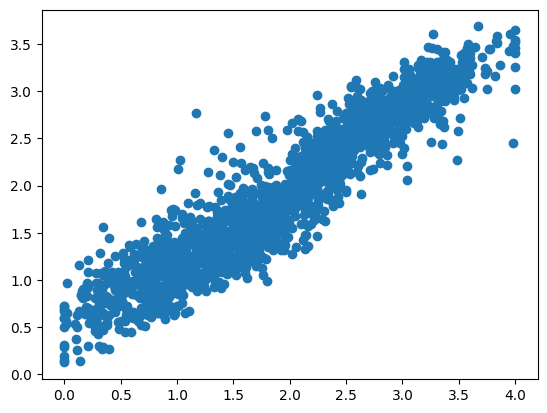

In [59]:
import matplotlib.pyplot as plt
plt.scatter(y_train,y_train_pred)

<Axes: xlabel='GPA'>

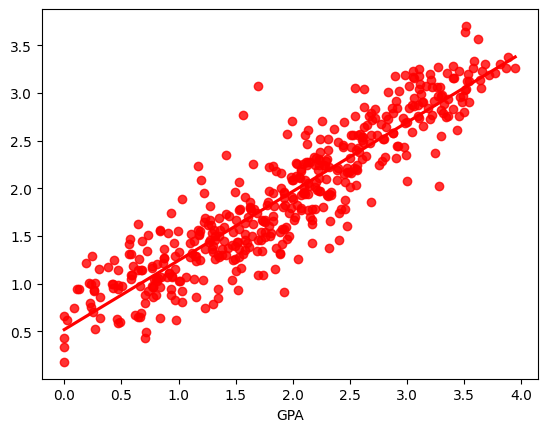

In [61]:
import seaborn as sns
sns.regplot(x=y_test,y=y_test_pred,ci=None,color ='red')

In [63]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_test_pred,'Difference':y_test-y_test_pred})
pred_df

,Actual Value,Predicted Value,Difference
733,1.004113,1.331179,-0.327066
1364,1.349256,1.299217,0.050039
2219,0.000000,0.338959,-0.338959
946,2.683855,2.794403,-0.110548
726,0.873091,1.267940,-0.394849
...,...,...,...
1991,2.074439,1.770084,0.304355
1606,0.423992,0.995436,-0.571445
167,2.298418,2.306931,-0.008513
1191,1.934784,1.822095,0.112689


In [64]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(x_train, y_train)
y_pred = lin_model.predict(x_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 96.28
